# Download Data & Imports

In [ ]:
import h5py
import pandas as pd
import numpy as np

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
from time import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.constraints import maxnorm
!pip install git+https://github.com/keras-team/keras-tuner
!pip install git+https://github.com/tensorflow/docs
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

import shap

# Loading Data

In [0]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        return pd.DataFrame(f[name][:])

train = load_data('train')
test  = load_data('test')

# Data Inspection

In [0]:
print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)


In [0]:
def find_unique(X):
  means = np.mean(np.array(X), axis=0)
  unique_values, unique_indices = np.unique(means, return_index=True)
  sorted_indices = np.sort(unique_indices)
  unique_variables = []
  for i in unique_indices:
    unique_variables.append(all_variables[i])
  return unique_variables

Found 13 replicate variables!
<class 'pandas.core.series.Series'>


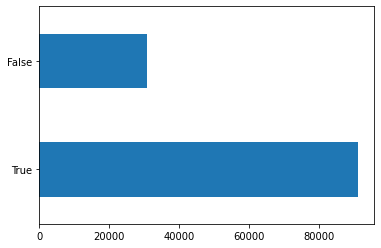

In [0]:
all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu', 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0', 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster', 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2', 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3', 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits', 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG', 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG', 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0', 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3', 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core', 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG', 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG', 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset', 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection', 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1', 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]
X = train[all_variables]
unique_variables = find_unique(X)
X = train[unique_variables]
print('Found {0:d} replicate variables!'.format(len(all_variables)-len(unique_variables)))
X = pd.DataFrame(StandardScaler().fit_transform(X))
X.columns = unique_variables
y = train['Truth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)
print(type(y_train))
y_train.value_counts().plot(kind='barh')
plt.show()


# Finding best Features

## Neural Network

### Setup

In [0]:
from keras.constraints import unit_norm

def build_model(input_sh):
  model = keras.models.Sequential([
    layers.Dense(160, activation='relu', input_shape=[input_sh], kernel_initializer='normal', kernel_constraint=unit_norm()),
    layers.Dropout(0.2),
    layers.Dense(80, activation='relu', kernel_initializer='normal', kernel_constraint=unit_norm()),
    layers.Dense(40, activation='relu', kernel_initializer='normal', kernel_constraint=unit_norm()),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid', kernel_initializer='normal')
  ])
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=4000,
    decay_rate=0.7,
    staircase=True)
  optimizer = keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

In [0]:
def build_model(input_sh):
  model = keras.models.Sequential([
    layers.Dense(17, activation='relu', input_shape=[input_sh], kernel_initializer='normal'),
    layers.Dense(18, activation='relu', kernel_initializer='normal'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='normal')
  ])
  optimizer = keras.optimizers.Adam(learning_rate = 0.001)
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

In [0]:
input_sh = len(X_train.keys())
print(input_sh)
model = build_model(input_sh)
model.summary()

147
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               23680     
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 39,841
Trainable params: 39,841
Non-trainable params: 0
________________________________________________

### Training

In [0]:
EPOCHS = 300
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
start = time()
history = model.fit(np.array(X_train), y_train,
                    epochs=EPOCHS,
                    validation_data=(np.array(X_test), y_test),
                    shuffle=True,
                    verbose=0,
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
print('\nThis took: %f minutes'%((time()-start)/60))


Epoch: 0, accuracy:0.9310,  loss:0.1883,  val_accuracy:0.9340,  val_loss:0.1768,  
..............
This took: 2.648726 minutes


In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
9,0.167189,0.937625,0.172483,0.937108,9
10,0.166403,0.937682,0.171127,0.936320,10
11,0.166951,0.937141,0.173727,0.936591,11
12,0.167318,0.937986,0.174937,0.936689,12
13,0.166526,0.938043,0.173097,0.935335,13


## Shapley Analysis

In [18]:
explainer = shap.DeepExplainer(model, X_train[:5000])
start = time()
shap_values = explainer.shap_values(np.array(X_train)[:5000], check_additivity=False)
print('Shapley analysis takes {0:3.1f} minutes'.format((time()-start)/60))

Shapley analysis takes 6.9 minutes


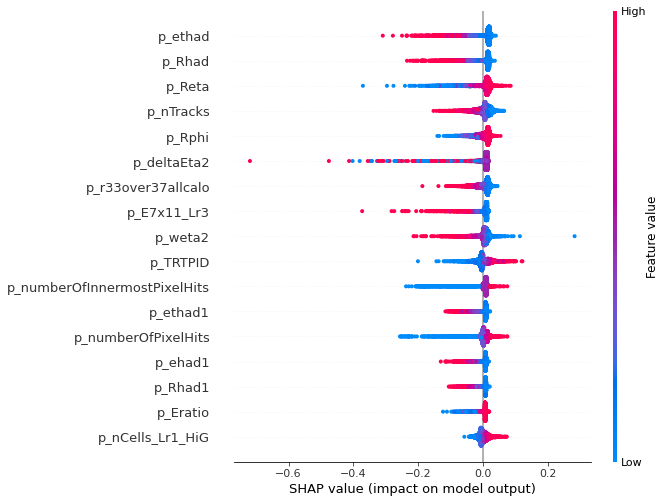

In [19]:
x = shap.summary_plot(np.array(shap_values)[0], features=X_train[:5000], feature_names=X_train.columns, max_display=17, sort=True)

In [20]:
shapley_sum = np.abs(shap_values[0]).mean(axis=0)
importance  = pd.DataFrame([X_train.columns.tolist(), shapley_sum.tolist()]).T
importance.columns = ['column_name', 'shapley_importance']
importance  = importance.sort_values('shapley_importance', ascending=False)
best_features = importance['column_name'].tolist()[:15]

X_best = X[best_features]
X_btrain, X_btest, y_train, y_test = train_test_split(X_best, y, test_size=.25, random_state=16)
importance.head(15)

,column_name,shapley_importance
104,p_ethad,0.0277133
52,p_Rhad,0.0252081
69,p_Reta,0.023094
75,p_nTracks,0.0197031
68,p_Rphi,0.0166759
37,p_deltaEta2,0.0166312
54,p_r33over37allcalo,0.0165389
107,p_E7x11_Lr3,0.0159751
42,p_weta2,0.0153501
56,p_TRTPID,0.0150148


# Hyperparameter Tuning

## Model Pre-Tuning

In [22]:
input_sh = len(X_best.keys())
pretune_model = build_model(input_sh)
EPOCHS = 300
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
start = time()
pretune_history = pretune_model.fit(np.array(X_btrain), y_train,
                                    epochs=EPOCHS,
                                    validation_data=(np.array(X_btest), y_test),
                                    verbose=0,
                                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])
print('\nThis took: %f minutes'%((time()-start)/60))


Epoch: 0, accuracy:0.9309,  loss:0.1993,  val_accuracy:0.9323,  val_loss:0.1962,  
...............
This took: 2.773885 minutes


In [23]:
hist = pd.DataFrame(pretune_history.history)
hist['epoch'] = pretune_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
10,0.182935,0.934827,0.184717,0.931865,10
11,0.183182,0.934441,0.183836,0.934006,11
12,0.182033,0.934827,0.186899,0.933046,12
13,0.182503,0.934753,0.186020,0.933489,13
14,0.182271,0.934572,0.185404,0.932652,14


## Tuning Process

In [0]:
from kerastuner import HyperModel
from tensorflow.keras.layers import (Dense)

class NNHyperModel_new(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        model  = keras.Sequential()
        hidden_layers = hp.Int('n_layers', min_value=0,  max_value=6,  step=1,  default=2)
        base_units    = int(np.power(2,4+hidden_layers))
        dropout_rate  = hp.Float('dropout', min_value=0.1, max_value=0.5, default=0.2)
        model.add(Dense(units=base_units, activation='relu', input_shape=[self.input_shape], kernel_constraint=unit_norm()))
        model.add(layers.Dropout(dropout_rate))
        for i in range(hidden_layers):
          model.add(Dense(units=base_units/(2*(i+1)), activation='relu', kernel_constraint=unit_norm()))
          if i%2 == 0:
            model.add(layers.Dropout(dropout_rate))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = keras.optimizers.Adam(
          hp.Float(
            'learning_rate',
            min_value=1e-4,
            max_value=1e-2,
            sampling='LOG',
            default=1e-3
          )
        )
        model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                    optimizer=optimizer,
                    metrics=['accuracy'])

        return model

In [25]:
from kerastuner.tuners import RandomSearch
INPUT_SHAPE = (len(X_best.keys()))
print(INPUT_SHAPE)
hypermodel = NNHyperModel_new(INPUT_SHAPE)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    seed=16,
    max_trials=200,
    executions_per_trial=1,
    directory='Log_Dir6'
)
tuner.search_space_summary()

15


In [26]:
N_EPOCH_SEARCH = 2
start = time()
tuner.search(X_btrain, y_train, batch_size=128, epochs=N_EPOCH_SEARCH, validation_split=0.2)

Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3137 - accuracy: 0.8915 - val_loss: 0.2037 - val_accuracy: 0.9296
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2229 - accuracy: 0.9262 - val_loss: 0.1955 - val_accuracy: 0.9323


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2790 - accuracy: 0.9081 - val_loss: 0.1972 - val_accuracy: 0.9322
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2165 - accuracy: 0.9277 - val_loss: 0.1932 - val_accuracy: 0.9330


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2175 - accuracy: 0.9264 - val_loss: 0.1869 - val_accuracy: 0.9339
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2003 - accuracy: 0.9308 - val_loss: 0.1934 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2306 - accuracy: 0.9188 - val_loss: 0.1898 - val_accuracy: 0.9325
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1986 - accuracy: 0.9312 - val_loss: 0.1868 - val_accuracy: 0.9334


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2589 - accuracy: 0.9106 - val_loss: 0.1939 - val_accuracy: 0.9331
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2122 - accuracy: 0.9269 - val_loss: 0.1893 - val_accuracy: 0.9331


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2536 - accuracy: 0.9112 - val_loss: 0.1986 - val_accuracy: 0.9308
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2031 - accuracy: 0.9307 - val_loss: 0.1925 - val_accuracy: 0.9328


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2536 - accuracy: 0.9148 - val_loss: 0.1919 - val_accuracy: 0.9332
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2098 - accuracy: 0.9291 - val_loss: 0.1868 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2467 - accuracy: 0.9164 - val_loss: 0.1928 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2055 - accuracy: 0.9296 - val_loss: 0.1870 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2150 - accuracy: 0.9282 - val_loss: 0.1839 - val_accuracy: 0.9340
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1971 - accuracy: 0.9325 - val_loss: 0.1835 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3831 - accuracy: 0.8548 - val_loss: 0.2320 - val_accuracy: 0.9228
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2349 - accuracy: 0.9226 - val_loss: 0.2074 - val_accuracy: 0.9285


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2077 - accuracy: 0.9288 - val_loss: 0.1836 - val_accuracy: 0.9332
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1946 - accuracy: 0.9321 - val_loss: 0.1820 - val_accuracy: 0.9351


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.4404 - accuracy: 0.8142 - val_loss: 0.2583 - val_accuracy: 0.9174
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2459 - accuracy: 0.9209 - val_loss: 0.2118 - val_accuracy: 0.9267


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2162 - accuracy: 0.9266 - val_loss: 0.2000 - val_accuracy: 0.9326
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2047 - accuracy: 0.9303 - val_loss: 0.1910 - val_accuracy: 0.9323


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.6731 - accuracy: 0.7754 - val_loss: 0.3103 - val_accuracy: 0.8940
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3793 - accuracy: 0.8569 - val_loss: 0.2417 - val_accuracy: 0.9136


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2424 - accuracy: 0.9200 - val_loss: 0.1903 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2022 - accuracy: 0.9315 - val_loss: 0.1857 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2577 - accuracy: 0.9146 - val_loss: 0.1925 - val_accuracy: 0.9323
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2156 - accuracy: 0.9280 - val_loss: 0.1873 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3134 - accuracy: 0.8949 - val_loss: 0.2011 - val_accuracy: 0.9300
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2219 - accuracy: 0.9269 - val_loss: 0.1937 - val_accuracy: 0.9323


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2435 - accuracy: 0.9209 - val_loss: 0.1984 - val_accuracy: 0.9308
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2150 - accuracy: 0.9278 - val_loss: 0.1948 - val_accuracy: 0.9317


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2342 - accuracy: 0.9182 - val_loss: 0.1865 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1978 - accuracy: 0.9323 - val_loss: 0.1838 - val_accuracy: 0.9343


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2712 - accuracy: 0.9089 - val_loss: 0.1959 - val_accuracy: 0.9318
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2129 - accuracy: 0.9270 - val_loss: 0.1913 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2180 - accuracy: 0.9234 - val_loss: 0.1902 - val_accuracy: 0.9323
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1975 - accuracy: 0.9305 - val_loss: 0.1859 - val_accuracy: 0.9341


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2517 - accuracy: 0.9128 - val_loss: 0.1958 - val_accuracy: 0.9313
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2077 - accuracy: 0.9300 - val_loss: 0.1900 - val_accuracy: 0.9334


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2342 - accuracy: 0.9218 - val_loss: 0.1889 - val_accuracy: 0.9324
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2021 - accuracy: 0.9311 - val_loss: 0.1848 - val_accuracy: 0.9346


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4717 - accuracy: 0.8252 - val_loss: 0.2325 - val_accuracy: 0.9212
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2881 - accuracy: 0.8930 - val_loss: 0.2094 - val_accuracy: 0.9270


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2774 - accuracy: 0.9043 - val_loss: 0.1981 - val_accuracy: 0.9301
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2045 - accuracy: 0.9295 - val_loss: 0.1904 - val_accuracy: 0.9330


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2127 - accuracy: 0.9267 - val_loss: 0.1861 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.1988 - accuracy: 0.9301 - val_loss: 0.1853 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2624 - accuracy: 0.9152 - val_loss: 0.1926 - val_accuracy: 0.9334
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2167 - accuracy: 0.9289 - val_loss: 0.1895 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2742 - accuracy: 0.9076 - val_loss: 0.1982 - val_accuracy: 0.9310
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2132 - accuracy: 0.9279 - val_loss: 0.1906 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3756 - accuracy: 0.8641 - val_loss: 0.2211 - val_accuracy: 0.9243
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2525 - accuracy: 0.9171 - val_loss: 0.2049 - val_accuracy: 0.9293


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2202 - accuracy: 0.9253 - val_loss: 0.1910 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2051 - accuracy: 0.9291 - val_loss: 0.1941 - val_accuracy: 0.9305


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2460 - accuracy: 0.9202 - val_loss: 0.1914 - val_accuracy: 0.9343
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1997 - accuracy: 0.9312 - val_loss: 0.1853 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2178 - accuracy: 0.9248 - val_loss: 0.1881 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1992 - accuracy: 0.9300 - val_loss: 0.1851 - val_accuracy: 0.9325


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2441 - accuracy: 0.9166 - val_loss: 0.1903 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1986 - accuracy: 0.9320 - val_loss: 0.1846 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2403 - accuracy: 0.9189 - val_loss: 0.1878 - val_accuracy: 0.9340
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2055 - accuracy: 0.9307 - val_loss: 0.1851 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2245 - accuracy: 0.9241 - val_loss: 0.1991 - val_accuracy: 0.9344
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1992 - accuracy: 0.9312 - val_loss: 0.1966 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.5191 - accuracy: 0.8093 - val_loss: 0.2690 - val_accuracy: 0.9135
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2914 - accuracy: 0.8979 - val_loss: 0.2200 - val_accuracy: 0.9231


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2129 - accuracy: 0.9270 - val_loss: 0.1929 - val_accuracy: 0.9307
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1980 - accuracy: 0.9313 - val_loss: 0.1947 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2886 - accuracy: 0.8990 - val_loss: 0.2048 - val_accuracy: 0.9295
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2287 - accuracy: 0.9255 - val_loss: 0.1985 - val_accuracy: 0.9309


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2239 - accuracy: 0.9243 - val_loss: 0.1883 - val_accuracy: 0.9346
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9313 - val_loss: 0.1842 - val_accuracy: 0.9346


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2192 - accuracy: 0.9265 - val_loss: 0.1840 - val_accuracy: 0.9343
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1999 - accuracy: 0.9315 - val_loss: 0.1832 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2668 - accuracy: 0.9047 - val_loss: 0.1927 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2005 - accuracy: 0.9306 - val_loss: 0.1869 - val_accuracy: 0.9346


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2932 - accuracy: 0.8933 - val_loss: 0.2056 - val_accuracy: 0.9295
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2240 - accuracy: 0.9250 - val_loss: 0.1995 - val_accuracy: 0.9308


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2681 - accuracy: 0.9100 - val_loss: 0.1928 - val_accuracy: 0.9330
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2196 - accuracy: 0.9291 - val_loss: 0.1867 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2019 - accuracy: 0.9303 - val_loss: 0.1814 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1913 - accuracy: 0.9330 - val_loss: 0.1849 - val_accuracy: 0.9341


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2054 - accuracy: 0.9281 - val_loss: 0.1857 - val_accuracy: 0.9344
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1901 - accuracy: 0.9325 - val_loss: 0.1815 - val_accuracy: 0.9348


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2146 - accuracy: 0.9267 - val_loss: 0.2004 - val_accuracy: 0.9327
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2043 - accuracy: 0.9287 - val_loss: 0.1893 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2862 - accuracy: 0.9022 - val_loss: 0.1980 - val_accuracy: 0.9308
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2186 - accuracy: 0.9271 - val_loss: 0.1905 - val_accuracy: 0.9333


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2262 - accuracy: 0.9221 - val_loss: 0.1890 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1995 - accuracy: 0.9305 - val_loss: 0.1877 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4248 - accuracy: 0.8262 - val_loss: 0.2518 - val_accuracy: 0.9194
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2713 - accuracy: 0.9139 - val_loss: 0.2240 - val_accuracy: 0.9252


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2952 - accuracy: 0.9099 - val_loss: 0.2025 - val_accuracy: 0.9305
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2120 - accuracy: 0.9284 - val_loss: 0.1935 - val_accuracy: 0.9332


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2177 - accuracy: 0.9252 - val_loss: 0.1874 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1970 - accuracy: 0.9315 - val_loss: 0.1839 - val_accuracy: 0.9343


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2185 - accuracy: 0.9245 - val_loss: 0.1881 - val_accuracy: 0.9339
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1978 - accuracy: 0.9311 - val_loss: 0.1845 - val_accuracy: 0.9335


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2048 - accuracy: 0.9285 - val_loss: 0.1878 - val_accuracy: 0.9331
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1931 - accuracy: 0.9319 - val_loss: 0.1829 - val_accuracy: 0.9343


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2019 - accuracy: 0.9307 - val_loss: 0.1878 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1940 - accuracy: 0.9319 - val_loss: 0.1890 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2315 - accuracy: 0.9218 - val_loss: 0.1896 - val_accuracy: 0.9345
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2012 - accuracy: 0.9308 - val_loss: 0.1876 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3007 - accuracy: 0.9004 - val_loss: 0.1994 - val_accuracy: 0.9311
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2203 - accuracy: 0.9280 - val_loss: 0.1925 - val_accuracy: 0.9330


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3003 - accuracy: 0.8972 - val_loss: 0.2010 - val_accuracy: 0.9293
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2246 - accuracy: 0.9247 - val_loss: 0.1941 - val_accuracy: 0.9314


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2538 - accuracy: 0.9123 - val_loss: 0.1934 - val_accuracy: 0.9319
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2059 - accuracy: 0.9299 - val_loss: 0.1883 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.3442 - accuracy: 0.8745 - val_loss: 0.2213 - val_accuracy: 0.9213
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2370 - accuracy: 0.9208 - val_loss: 0.2054 - val_accuracy: 0.9277


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9215 - val_loss: 0.1885 - val_accuracy: 0.9318
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2072 - accuracy: 0.9301 - val_loss: 0.1851 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2811 - accuracy: 0.8963 - val_loss: 0.1983 - val_accuracy: 0.9310
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2129 - accuracy: 0.9283 - val_loss: 0.1903 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3317 - accuracy: 0.8879 - val_loss: 0.2094 - val_accuracy: 0.9273
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2144 - accuracy: 0.9275 - val_loss: 0.1994 - val_accuracy: 0.9306


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2048 - accuracy: 0.9290 - val_loss: 0.1825 - val_accuracy: 0.9346
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1909 - accuracy: 0.9330 - val_loss: 0.1834 - val_accuracy: 0.9353


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2154 - accuracy: 0.9256 - val_loss: 0.1830 - val_accuracy: 0.9344
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1905 - accuracy: 0.9328 - val_loss: 0.1833 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2599 - accuracy: 0.9121 - val_loss: 0.1940 - val_accuracy: 0.9319
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2071 - accuracy: 0.9288 - val_loss: 0.1889 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2878 - accuracy: 0.9000 - val_loss: 0.1979 - val_accuracy: 0.9312
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2168 - accuracy: 0.9286 - val_loss: 0.1918 - val_accuracy: 0.9333


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2014 - accuracy: 0.9307 - val_loss: 0.1842 - val_accuracy: 0.9339
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1920 - accuracy: 0.9323 - val_loss: 0.1886 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2046 - accuracy: 0.9295 - val_loss: 0.1937 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1941 - accuracy: 0.9323 - val_loss: 0.1877 - val_accuracy: 0.9306


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2027 - accuracy: 0.9294 - val_loss: 0.1862 - val_accuracy: 0.9296
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1913 - accuracy: 0.9329 - val_loss: 0.1814 - val_accuracy: 0.9347


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2033 - accuracy: 0.9298 - val_loss: 0.1832 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9325 - val_loss: 0.1833 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2071 - accuracy: 0.9288 - val_loss: 0.1872 - val_accuracy: 0.9305
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1981 - accuracy: 0.9313 - val_loss: 0.1885 - val_accuracy: 0.9327


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2163 - accuracy: 0.9262 - val_loss: 0.1917 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2020 - accuracy: 0.9304 - val_loss: 0.1916 - val_accuracy: 0.9291


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2832 - accuracy: 0.9017 - val_loss: 0.1957 - val_accuracy: 0.9312
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2109 - accuracy: 0.9284 - val_loss: 0.1902 - val_accuracy: 0.9325


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2284 - accuracy: 0.9227 - val_loss: 0.1904 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1991 - accuracy: 0.9304 - val_loss: 0.1844 - val_accuracy: 0.9332


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2032 - accuracy: 0.9294 - val_loss: 0.1853 - val_accuracy: 0.9330
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1951 - accuracy: 0.9321 - val_loss: 0.1866 - val_accuracy: 0.9299


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2045 - accuracy: 0.9297 - val_loss: 0.1884 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1979 - accuracy: 0.9313 - val_loss: 0.1982 - val_accuracy: 0.9312


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2123 - accuracy: 0.9280 - val_loss: 0.2082 - val_accuracy: 0.9264
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1975 - accuracy: 0.9311 - val_loss: 0.1919 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2907 - accuracy: 0.9030 - val_loss: 0.1972 - val_accuracy: 0.9314
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2262 - accuracy: 0.9270 - val_loss: 0.1919 - val_accuracy: 0.9335


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2141 - accuracy: 0.9248 - val_loss: 0.1852 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1935 - accuracy: 0.9318 - val_loss: 0.1844 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3006 - accuracy: 0.9017 - val_loss: 0.2013 - val_accuracy: 0.9293
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2198 - accuracy: 0.9264 - val_loss: 0.1946 - val_accuracy: 0.9315


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2135 - accuracy: 0.9274 - val_loss: 0.1869 - val_accuracy: 0.9331
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9323 - val_loss: 0.1819 - val_accuracy: 0.9349


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2685 - accuracy: 0.9121 - val_loss: 0.2077 - val_accuracy: 0.9278
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2125 - accuracy: 0.9282 - val_loss: 0.2000 - val_accuracy: 0.9306


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2346 - accuracy: 0.9204 - val_loss: 0.1890 - val_accuracy: 0.9330
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2000 - accuracy: 0.9306 - val_loss: 0.1867 - val_accuracy: 0.9340


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2657 - accuracy: 0.9098 - val_loss: 0.1957 - val_accuracy: 0.9330
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2119 - accuracy: 0.9292 - val_loss: 0.1889 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2033 - accuracy: 0.9296 - val_loss: 0.1907 - val_accuracy: 0.9307
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1925 - accuracy: 0.9328 - val_loss: 0.1917 - val_accuracy: 0.9325


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3378 - accuracy: 0.8847 - val_loss: 0.2031 - val_accuracy: 0.9297
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2395 - accuracy: 0.9231 - val_loss: 0.1949 - val_accuracy: 0.9325


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3324 - accuracy: 0.8829 - val_loss: 0.2058 - val_accuracy: 0.9291
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2401 - accuracy: 0.9187 - val_loss: 0.1963 - val_accuracy: 0.9316


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2332 - accuracy: 0.9222 - val_loss: 0.1880 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2033 - accuracy: 0.9309 - val_loss: 0.1854 - val_accuracy: 0.9349


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2082 - accuracy: 0.9289 - val_loss: 0.1866 - val_accuracy: 0.9343
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1904 - accuracy: 0.9332 - val_loss: 0.1820 - val_accuracy: 0.9348


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2013 - accuracy: 0.9303 - val_loss: 0.1859 - val_accuracy: 0.9345
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1891 - accuracy: 0.9334 - val_loss: 0.1813 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2135 - accuracy: 0.9273 - val_loss: 0.1867 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2019 - accuracy: 0.9298 - val_loss: 0.1848 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2095 - accuracy: 0.9286 - val_loss: 0.1857 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1964 - accuracy: 0.9323 - val_loss: 0.1866 - val_accuracy: 0.9348


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2305 - accuracy: 0.9233 - val_loss: 0.1881 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1994 - accuracy: 0.9312 - val_loss: 0.1831 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2026 - accuracy: 0.9306 - val_loss: 0.1859 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1907 - accuracy: 0.9326 - val_loss: 0.1821 - val_accuracy: 0.9335


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2419 - accuracy: 0.9192 - val_loss: 0.1918 - val_accuracy: 0.9332
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2031 - accuracy: 0.9302 - val_loss: 0.1864 - val_accuracy: 0.9335


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.5957 - accuracy: 0.6382 - val_loss: 0.3528 - val_accuracy: 0.9092
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2985 - accuracy: 0.9109 - val_loss: 0.2224 - val_accuracy: 0.9210


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2779 - accuracy: 0.9042 - val_loss: 0.1970 - val_accuracy: 0.9309
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2100 - accuracy: 0.9291 - val_loss: 0.1917 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2529 - accuracy: 0.9162 - val_loss: 0.1955 - val_accuracy: 0.9325
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2014 - accuracy: 0.9310 - val_loss: 0.1871 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2332 - accuracy: 0.9221 - val_loss: 0.1897 - val_accuracy: 0.9321
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2078 - accuracy: 0.9292 - val_loss: 0.1843 - val_accuracy: 0.9343


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2243 - accuracy: 0.9236 - val_loss: 0.1859 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1957 - accuracy: 0.9322 - val_loss: 0.1826 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2403 - accuracy: 0.9170 - val_loss: 0.1973 - val_accuracy: 0.9316
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2091 - accuracy: 0.9277 - val_loss: 0.1944 - val_accuracy: 0.9327


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3493 - accuracy: 0.8643 - val_loss: 0.2110 - val_accuracy: 0.9257
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2307 - accuracy: 0.9236 - val_loss: 0.2002 - val_accuracy: 0.9301


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2159 - accuracy: 0.9275 - val_loss: 0.1849 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1992 - accuracy: 0.9320 - val_loss: 0.1819 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2017 - accuracy: 0.9304 - val_loss: 0.1852 - val_accuracy: 0.9340
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1921 - accuracy: 0.9332 - val_loss: 0.1850 - val_accuracy: 0.9288


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2125 - accuracy: 0.9276 - val_loss: 0.1929 - val_accuracy: 0.9324
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2002 - accuracy: 0.9301 - val_loss: 0.1963 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2047 - accuracy: 0.9296 - val_loss: 0.1856 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1934 - accuracy: 0.9329 - val_loss: 0.1860 - val_accuracy: 0.9318


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2156 - accuracy: 0.9273 - val_loss: 0.1854 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1914 - accuracy: 0.9329 - val_loss: 0.1825 - val_accuracy: 0.9351


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4159 - accuracy: 0.8398 - val_loss: 0.2331 - val_accuracy: 0.9207
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2355 - accuracy: 0.9221 - val_loss: 0.2093 - val_accuracy: 0.9276


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3419 - accuracy: 0.8822 - val_loss: 0.2083 - val_accuracy: 0.9275
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2285 - accuracy: 0.9234 - val_loss: 0.1983 - val_accuracy: 0.9310


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2206 - accuracy: 0.9235 - val_loss: 0.1865 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1988 - accuracy: 0.9311 - val_loss: 0.1847 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2064 - accuracy: 0.9294 - val_loss: 0.1869 - val_accuracy: 0.9339
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1970 - accuracy: 0.9318 - val_loss: 0.1873 - val_accuracy: 0.9319


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2201 - accuracy: 0.9247 - val_loss: 0.1866 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1987 - accuracy: 0.9301 - val_loss: 0.1858 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2138 - accuracy: 0.9275 - val_loss: 0.1850 - val_accuracy: 0.9340
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1919 - accuracy: 0.9329 - val_loss: 0.1839 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3893 - accuracy: 0.8573 - val_loss: 0.2165 - val_accuracy: 0.9256
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2508 - accuracy: 0.9180 - val_loss: 0.2016 - val_accuracy: 0.9306


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2049 - accuracy: 0.9295 - val_loss: 0.1854 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1958 - accuracy: 0.9310 - val_loss: 0.1856 - val_accuracy: 0.9318


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2136 - accuracy: 0.9274 - val_loss: 0.1931 - val_accuracy: 0.9301
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2006 - accuracy: 0.9314 - val_loss: 0.1848 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2559 - accuracy: 0.9124 - val_loss: 0.1899 - val_accuracy: 0.9326
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2083 - accuracy: 0.9295 - val_loss: 0.1883 - val_accuracy: 0.9334


Epoch 1/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2635 - accuracy: 0.9120 - val_loss: 0.1979 - val_accuracy: 0.9310
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2192 - accuracy: 0.9282 - val_loss: 0.1950 - val_accuracy: 0.9325


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4082 - accuracy: 0.8394 - val_loss: 0.2440 - val_accuracy: 0.9121
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2509 - accuracy: 0.9154 - val_loss: 0.2115 - val_accuracy: 0.9259


Epoch 1/2
762/762 [==============================] - 3s 5ms/step - loss: 0.3775 - accuracy: 0.8634 - val_loss: 0.2331 - val_accuracy: 0.9270
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2345 - accuracy: 0.9238 - val_loss: 0.2107 - val_accuracy: 0.9293


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2614 - accuracy: 0.9148 - val_loss: 0.1961 - val_accuracy: 0.9326
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2038 - accuracy: 0.9301 - val_loss: 0.1877 - val_accuracy: 0.9341


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.3384 - accuracy: 0.8643 - val_loss: 0.2094 - val_accuracy: 0.9265
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2358 - accuracy: 0.9248 - val_loss: 0.2011 - val_accuracy: 0.9298


Epoch 1/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2389 - accuracy: 0.9194 - val_loss: 0.1971 - val_accuracy: 0.9310
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2118 - accuracy: 0.9274 - val_loss: 0.1941 - val_accuracy: 0.9318


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2078 - accuracy: 0.9286 - val_loss: 0.1887 - val_accuracy: 0.9344
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1946 - accuracy: 0.9326 - val_loss: 0.1857 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2120 - accuracy: 0.9280 - val_loss: 0.1882 - val_accuracy: 0.9351
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1981 - accuracy: 0.9317 - val_loss: 0.1865 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2513 - accuracy: 0.9134 - val_loss: 0.1900 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2105 - accuracy: 0.9295 - val_loss: 0.1871 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2146 - accuracy: 0.9275 - val_loss: 0.1860 - val_accuracy: 0.9345
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1931 - accuracy: 0.9327 - val_loss: 0.1835 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.6397 - accuracy: 0.7743 - val_loss: 0.3060 - val_accuracy: 0.9182
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.3429 - accuracy: 0.8813 - val_loss: 0.2231 - val_accuracy: 0.9234


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2108 - accuracy: 0.9265 - val_loss: 0.1844 - val_accuracy: 0.9339
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1937 - accuracy: 0.9315 - val_loss: 0.1855 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4561 - accuracy: 0.8241 - val_loss: 0.2688 - val_accuracy: 0.9139
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2485 - accuracy: 0.9175 - val_loss: 0.2159 - val_accuracy: 0.9251


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2181 - accuracy: 0.9262 - val_loss: 0.1876 - val_accuracy: 0.9328
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2014 - accuracy: 0.9304 - val_loss: 0.1818 - val_accuracy: 0.9343


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2150 - accuracy: 0.9268 - val_loss: 0.1840 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1923 - accuracy: 0.9336 - val_loss: 0.1813 - val_accuracy: 0.9346


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2673 - accuracy: 0.9075 - val_loss: 0.1957 - val_accuracy: 0.9311
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2135 - accuracy: 0.9284 - val_loss: 0.1899 - val_accuracy: 0.9331


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2071 - accuracy: 0.9286 - val_loss: 0.1898 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1992 - accuracy: 0.9312 - val_loss: 0.1856 - val_accuracy: 0.9348


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4020 - accuracy: 0.8475 - val_loss: 0.2266 - val_accuracy: 0.9234
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2494 - accuracy: 0.9179 - val_loss: 0.2096 - val_accuracy: 0.9281


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2228 - accuracy: 0.9241 - val_loss: 0.1864 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1965 - accuracy: 0.9320 - val_loss: 0.1832 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2732 - accuracy: 0.9116 - val_loss: 0.1967 - val_accuracy: 0.9315
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2152 - accuracy: 0.9283 - val_loss: 0.1903 - val_accuracy: 0.9327


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2403 - accuracy: 0.9150 - val_loss: 0.1895 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2003 - accuracy: 0.9314 - val_loss: 0.1856 - val_accuracy: 0.9340


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2479 - accuracy: 0.9178 - val_loss: 0.1925 - val_accuracy: 0.9326
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2054 - accuracy: 0.9291 - val_loss: 0.1879 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2096 - accuracy: 0.9273 - val_loss: 0.1859 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1995 - accuracy: 0.9298 - val_loss: 0.1846 - val_accuracy: 0.9341


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3190 - accuracy: 0.8844 - val_loss: 0.2046 - val_accuracy: 0.9291
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2202 - accuracy: 0.9261 - val_loss: 0.1959 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2684 - accuracy: 0.9096 - val_loss: 0.1962 - val_accuracy: 0.9315
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2066 - accuracy: 0.9286 - val_loss: 0.1905 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2994 - accuracy: 0.8893 - val_loss: 0.1988 - val_accuracy: 0.9306
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2223 - accuracy: 0.9251 - val_loss: 0.1931 - val_accuracy: 0.9323


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2635 - accuracy: 0.9122 - val_loss: 0.1913 - val_accuracy: 0.9332
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2153 - accuracy: 0.9295 - val_loss: 0.1872 - val_accuracy: 0.9340


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3207 - accuracy: 0.8891 - val_loss: 0.2069 - val_accuracy: 0.9281
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2148 - accuracy: 0.9269 - val_loss: 0.1969 - val_accuracy: 0.9318


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.4381 - accuracy: 0.8398 - val_loss: 0.2538 - val_accuracy: 0.9112
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2464 - accuracy: 0.9159 - val_loss: 0.2193 - val_accuracy: 0.9249


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2239 - accuracy: 0.9243 - val_loss: 0.1874 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1991 - accuracy: 0.9301 - val_loss: 0.1866 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2039 - accuracy: 0.9297 - val_loss: 0.2001 - val_accuracy: 0.9278
Epoch 2/2
762/762 [==============================] - 5s 7ms/step - loss: 0.1970 - accuracy: 0.9315 - val_loss: 0.2015 - val_accuracy: 0.9330


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2355 - accuracy: 0.9182 - val_loss: 0.1887 - val_accuracy: 0.9340
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1996 - accuracy: 0.9306 - val_loss: 0.1852 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3156 - accuracy: 0.8958 - val_loss: 0.2091 - val_accuracy: 0.9291
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2262 - accuracy: 0.9254 - val_loss: 0.1991 - val_accuracy: 0.9320


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2102 - accuracy: 0.9278 - val_loss: 0.1939 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2014 - accuracy: 0.9306 - val_loss: 0.1886 - val_accuracy: 0.9306


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1994 - accuracy: 0.9307 - val_loss: 0.1862 - val_accuracy: 0.9341
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1920 - accuracy: 0.9322 - val_loss: 0.1845 - val_accuracy: 0.9323


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2339 - accuracy: 0.9198 - val_loss: 0.1880 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1995 - accuracy: 0.9318 - val_loss: 0.1836 - val_accuracy: 0.9346


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2067 - accuracy: 0.9288 - val_loss: 0.1833 - val_accuracy: 0.9343
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1949 - accuracy: 0.9322 - val_loss: 0.1818 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2180 - accuracy: 0.9253 - val_loss: 0.1855 - val_accuracy: 0.9330
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1991 - accuracy: 0.9309 - val_loss: 0.1929 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2129 - accuracy: 0.9281 - val_loss: 0.1902 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1943 - accuracy: 0.9323 - val_loss: 0.1848 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2629 - accuracy: 0.9142 - val_loss: 0.1935 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2056 - accuracy: 0.9304 - val_loss: 0.1870 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2050 - accuracy: 0.9294 - val_loss: 0.1918 - val_accuracy: 0.9265
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1968 - accuracy: 0.9316 - val_loss: 0.1840 - val_accuracy: 0.9347


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2085 - accuracy: 0.9291 - val_loss: 0.1887 - val_accuracy: 0.9318
Epoch 2/2
762/762 [==============================] - 5s 7ms/step - loss: 0.1976 - accuracy: 0.9314 - val_loss: 0.1892 - val_accuracy: 0.9302


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2109 - accuracy: 0.9282 - val_loss: 0.1876 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1986 - accuracy: 0.9316 - val_loss: 0.1847 - val_accuracy: 0.9347


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2087 - accuracy: 0.9280 - val_loss: 0.1848 - val_accuracy: 0.9336
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1917 - accuracy: 0.9326 - val_loss: 0.1832 - val_accuracy: 0.9353


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2729 - accuracy: 0.9094 - val_loss: 0.1933 - val_accuracy: 0.9314
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2202 - accuracy: 0.9285 - val_loss: 0.1900 - val_accuracy: 0.9315


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2209 - accuracy: 0.9240 - val_loss: 0.1853 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1956 - accuracy: 0.9324 - val_loss: 0.1820 - val_accuracy: 0.9348


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2777 - accuracy: 0.9067 - val_loss: 0.1994 - val_accuracy: 0.9311
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2235 - accuracy: 0.9263 - val_loss: 0.1933 - val_accuracy: 0.9327


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2225 - accuracy: 0.9264 - val_loss: 0.1863 - val_accuracy: 0.9344
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2028 - accuracy: 0.9306 - val_loss: 0.1850 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.5437 - accuracy: 0.7297 - val_loss: 0.3157 - val_accuracy: 0.9137
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2685 - accuracy: 0.9166 - val_loss: 0.2225 - val_accuracy: 0.9243


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2059 - accuracy: 0.9278 - val_loss: 0.1860 - val_accuracy: 0.9325
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1902 - accuracy: 0.9326 - val_loss: 0.1822 - val_accuracy: 0.9347


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2259 - accuracy: 0.9242 - val_loss: 0.1871 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2040 - accuracy: 0.9303 - val_loss: 0.1883 - val_accuracy: 0.9349


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2086 - accuracy: 0.9287 - val_loss: 0.1884 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1905 - accuracy: 0.9332 - val_loss: 0.1856 - val_accuracy: 0.9347


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2069 - accuracy: 0.9287 - val_loss: 0.1963 - val_accuracy: 0.9260
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1960 - accuracy: 0.9316 - val_loss: 0.1880 - val_accuracy: 0.9336


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2173 - accuracy: 0.9261 - val_loss: 0.1888 - val_accuracy: 0.9334
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2050 - accuracy: 0.9298 - val_loss: 0.1896 - val_accuracy: 0.9335


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2105 - accuracy: 0.9273 - val_loss: 0.1897 - val_accuracy: 0.9328
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.1988 - accuracy: 0.9309 - val_loss: 0.1953 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2809 - accuracy: 0.9016 - val_loss: 0.1966 - val_accuracy: 0.9319
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2126 - accuracy: 0.9286 - val_loss: 0.1906 - val_accuracy: 0.9337


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2428 - accuracy: 0.9177 - val_loss: 0.1887 - val_accuracy: 0.9326
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2094 - accuracy: 0.9283 - val_loss: 0.1870 - val_accuracy: 0.9329


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2142 - accuracy: 0.9267 - val_loss: 0.1859 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1933 - accuracy: 0.9322 - val_loss: 0.1828 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2089 - accuracy: 0.9276 - val_loss: 0.1857 - val_accuracy: 0.9346
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1938 - accuracy: 0.9320 - val_loss: 0.1843 - val_accuracy: 0.9340


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2728 - accuracy: 0.9072 - val_loss: 0.1963 - val_accuracy: 0.9323
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2049 - accuracy: 0.9302 - val_loss: 0.1898 - val_accuracy: 0.9341


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2402 - accuracy: 0.9198 - val_loss: 0.1975 - val_accuracy: 0.9318
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2158 - accuracy: 0.9258 - val_loss: 0.1967 - val_accuracy: 0.9291


Epoch 1/2
762/762 [==============================] - 5s 7ms/step - loss: 0.2518 - accuracy: 0.9159 - val_loss: 0.1922 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2064 - accuracy: 0.9302 - val_loss: 0.1854 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2911 - accuracy: 0.9021 - val_loss: 0.1960 - val_accuracy: 0.9320
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2163 - accuracy: 0.9283 - val_loss: 0.1901 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2009 - accuracy: 0.9298 - val_loss: 0.1897 - val_accuracy: 0.9312
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1945 - accuracy: 0.9316 - val_loss: 0.1857 - val_accuracy: 0.9319


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2757 - accuracy: 0.9045 - val_loss: 0.2016 - val_accuracy: 0.9297
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2201 - accuracy: 0.9264 - val_loss: 0.1967 - val_accuracy: 0.9320


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2060 - accuracy: 0.9291 - val_loss: 0.1893 - val_accuracy: 0.9337
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1975 - accuracy: 0.9311 - val_loss: 0.1868 - val_accuracy: 0.9328


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2327 - accuracy: 0.9175 - val_loss: 0.1861 - val_accuracy: 0.9345
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1997 - accuracy: 0.9317 - val_loss: 0.1848 - val_accuracy: 0.9344


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4541 - accuracy: 0.8268 - val_loss: 0.2466 - val_accuracy: 0.9217
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2757 - accuracy: 0.9097 - val_loss: 0.2160 - val_accuracy: 0.9258


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2640 - accuracy: 0.9119 - val_loss: 0.1932 - val_accuracy: 0.9299
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2201 - accuracy: 0.9267 - val_loss: 0.1900 - val_accuracy: 0.9318


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2090 - accuracy: 0.9286 - val_loss: 0.1855 - val_accuracy: 0.9338
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1921 - accuracy: 0.9324 - val_loss: 0.1823 - val_accuracy: 0.9338


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2797 - accuracy: 0.9029 - val_loss: 0.1996 - val_accuracy: 0.9310
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2181 - accuracy: 0.9264 - val_loss: 0.1931 - val_accuracy: 0.9332


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2991 - accuracy: 0.8935 - val_loss: 0.1987 - val_accuracy: 0.9311
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2276 - accuracy: 0.9268 - val_loss: 0.1922 - val_accuracy: 0.9330


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.3294 - accuracy: 0.8892 - val_loss: 0.2086 - val_accuracy: 0.9282
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2358 - accuracy: 0.9243 - val_loss: 0.1976 - val_accuracy: 0.9317


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2128 - accuracy: 0.9273 - val_loss: 0.1926 - val_accuracy: 0.9335
Epoch 2/2
762/762 [==============================] - 4s 6ms/step - loss: 0.1974 - accuracy: 0.9311 - val_loss: 0.1903 - val_accuracy: 0.9339


Epoch 1/2
762/762 [==============================] - 3s 5ms/step - loss: 0.2486 - accuracy: 0.9078 - val_loss: 0.1925 - val_accuracy: 0.9333
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2006 - accuracy: 0.9311 - val_loss: 0.1874 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.5134 - accuracy: 0.7869 - val_loss: 0.3109 - val_accuracy: 0.9172
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.3077 - accuracy: 0.9042 - val_loss: 0.2323 - val_accuracy: 0.9215


Epoch 1/2
762/762 [==============================] - 6s 8ms/step - loss: 0.2162 - accuracy: 0.9266 - val_loss: 0.1860 - val_accuracy: 0.9332
Epoch 2/2
762/762 [==============================] - 6s 8ms/step - loss: 0.1937 - accuracy: 0.9321 - val_loss: 0.1824 - val_accuracy: 0.9345


Epoch 1/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2177 - accuracy: 0.9260 - val_loss: 0.1931 - val_accuracy: 0.9311
Epoch 2/2
762/762 [==============================] - 5s 6ms/step - loss: 0.2063 - accuracy: 0.9287 - val_loss: 0.1884 - val_accuracy: 0.9314


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.4123 - accuracy: 0.8190 - val_loss: 0.2268 - val_accuracy: 0.9242
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2472 - accuracy: 0.9215 - val_loss: 0.2056 - val_accuracy: 0.9286


Epoch 1/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2270 - accuracy: 0.9222 - val_loss: 0.1954 - val_accuracy: 0.9318
Epoch 2/2
762/762 [==============================] - 3s 4ms/step - loss: 0.2037 - accuracy: 0.9293 - val_loss: 0.1919 - val_accuracy: 0.9326


Epoch 1/2
762/762 [==============================] - 4s 6ms/step - loss: 0.2006 - accuracy: 0.9303 - val_loss: 0.1830 - val_accuracy: 0.9342
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1903 - accuracy: 0.9335 - val_loss: 0.1829 - val_accuracy: 0.9353


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2128 - accuracy: 0.9284 - val_loss: 0.1852 - val_accuracy: 0.9351
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.1991 - accuracy: 0.9313 - val_loss: 0.1845 - val_accuracy: 0.9342


Epoch 1/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2819 - accuracy: 0.9021 - val_loss: 0.1973 - val_accuracy: 0.9315
Epoch 2/2
762/762 [==============================] - 4s 5ms/step - loss: 0.2084 - accuracy: 0.9285 - val_loss: 0.1911 - val_accuracy: 0.9326


INFO:tensorflow:Oracle triggered exit


## Tuning Results

In [27]:
print('This took: %f minutes'%((time()-start)/60))
# Show a summary of the search
tuner.results_summary(3)

# Retrieve the best model.
best_model = tuner.get_best_models(num_models=1)[0]

This took: 31.739001 minutes


In [28]:
X_test = X_test[best_features]
# Evaluate the best model.
loss = best_model.evaluate(X_btest, y_test)

1270/1270 [==============================] - 4s 3ms/step - loss: 0.1874 - accuracy: 0.9325


# Setup of tuned Model

In [29]:
hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print(hyperparameters)
def build_tuned_bottleneck(hyperparameters, input_shape):
  model = keras.Sequential()
  hidden_layers = hyperparameters['n_layers']
  base_units    = int(np.power(2,4+hidden_layers))
  dropout_rate  = hyperparameters['dropout']
  model.add(Dense(units=base_units, activation='relu', input_shape=[input_shape], kernel_constraint=unit_norm()))
  model.add(layers.Dropout(dropout_rate))
  for i in range(hidden_layers):
    model.add(Dense(units=base_units/(2*(i+1)), activation='relu', kernel_constraint=unit_norm())),
    if i%2 == 0:
      model.add(layers.Dropout(dropout_rate))
  model.add(Dense(1, activation='sigmoid'))

  optimizer = keras.optimizers.Adam(hyperparameters['learning_rate'])
  model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])
  return model

{'n_layers': 5, 'dropout': 0.15883362795569084, 'learning_rate': 0.00027099568345591985}


In [36]:
input_shape = np.array(X_btest).shape[1]
tuned_model = build_tuned_bottleneck(hyperparameters, input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               23680     
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                12880     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 39,841
Trainable params: 39,841
Non-trainable params: 0
____________________________________________________

In [37]:
EPOCHS = 400
early_stop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)
start = time()
tune_history = tuned_model.fit(np.array(X_btrain), y_train,
                                epochs=EPOCHS,
                                validation_data=(np.array(X_btest), y_test),
                                verbose=0,
                                callbacks=[early_stop, tfdocs.modeling.EpochDots()])
print('\nThis took: %3.1f minutes'%((time()-start)/60))


Epoch: 0, accuracy:0.9305,  loss:0.2014,  val_accuracy:0.9322,  val_loss:0.1887,  
............................
This took: 6.5 minutes


In [38]:
tune_history = pd.DataFrame(history.history)
tune_history['epoch'] = history.epoch
tune_history.tail(5)

,loss,accuracy,val_loss,val_accuracy,epoch
9,0.167189,0.937625,0.172483,0.937108,9
10,0.166403,0.937682,0.171127,0.936320,10
11,0.166951,0.937141,0.173727,0.936591,11
12,0.167318,0.937986,0.174937,0.936689,12
13,0.166526,0.938043,0.173097,0.935335,13


# Making Prediction

In [39]:
test_data = test[best_features]
standard_test_data = pd.DataFrame(StandardScaler().fit_transform(test_data), columns=best_features)
standard_test_data.head(5)

,p_ethad,p_Rhad,p_Reta,p_nTracks,p_Rphi,p_deltaEta2,p_r33over37allcalo,p_E7x11_Lr3,p_weta2,p_TRTPID,p_numberOfInnermostPixelHits,p_ethad1,p_numberOfPixelHits,p_ehad1,p_Rhad1
0,-0.193178,-0.177396,0.293434,-0.106448,0.673951,0.160550,0.240593,-0.459421,-0.653351,0.561669,0.046258,-0.233214,0.425992,-0.259375,-0.223217
1,-0.370895,-0.373334,-0.237259,-0.625495,0.201549,-0.207269,-0.828834,-0.415444,-1.557717,-0.401920,0.046258,-0.505497,-0.459717,-0.442022,-0.512730
2,-0.310522,-0.311497,0.274449,-0.625495,0.407782,0.095759,-0.962758,-0.175078,0.086402,-0.503727,0.046258,-0.377410,-0.459717,-0.420448,-0.374144
3,-0.313090,-0.313928,0.058212,-0.106448,0.536954,0.047245,0.173907,-0.255544,-0.835248,-0.240957,0.046258,-0.306154,-0.459717,-0.310285,-0.308000
4,-0.156775,-0.155119,-0.169946,1.969738,-3.032654,1.348472,2.098863,0.029218,1.043638,-1.980610,0.046258,0.102213,-0.459717,0.021271,0.109083


In [0]:
labels = tuned_model.predict(standard_test_data)

In [41]:
#labels = pd.Series(labels[:,0])
print(np.unique(np.round(np.array(labels)), return_counts=True)[1][1]/np.unique(np.round(np.array(labels)), return_counts=True)[1][0])

3.6140214831409043


In [46]:
pd.Series(labels[:,0]).head(15)

0     9.885786e-01
1     9.444923e-01
2     9.258059e-01
3     9.627609e-01
4     2.578218e-04
5     8.871381e-01
6     9.876696e-01
7     9.421515e-01
8     1.491569e-01
9     8.884137e-01
10    1.807735e-07
11    9.707078e-01
12    9.184163e-01
13    3.711856e-03
14    9.758685e-01
dtype: float32

In [0]:
pd.Series(labels[:,0]).to_csv('Classification_LaurentLindpointner_NeuralNet.txt', header=False)

In [0]:
pd.Series(best_features).to_csv('Classification_LaurentLindpointner_NeuralNet_VariableList.txt', index=False, header=False)